Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading raw dataset

In [3]:
# Load raw CSV
raw_df = pd.read_csv("messy_ice_detention.csv", header=None)

# Inspect first rows to locate real header
raw_df.head(10)


,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,These statistics are made available to the pub...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ICE FACILITIES DATA, FY25",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ICE Enforcement and Removal Operations Data, F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,This list is limited to facilities that have a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data Source: ICE Integrated Decision Support (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
7,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
8,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
9,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554


Removing metadata rows & set header

In [4]:
# The actual header starts at row index 6
df = raw_df.iloc[6:].reset_index(drop=True)

# Set header
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

df.head()

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.4311377,6.724550898,4.25748503,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401197605,4.323353293,22.60479042,32.63473054,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341317,3.461077844,6.083832335,6.185628743,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.5209581,47.41317365,76.00598802,52.48502994,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221556886,1.80E-02,0,0,NaN


Renaming columns

In [5]:
df = df.rename(columns={
    "Name": "name",
    "City": "city",
    "State": "state",
    "Level A": "level_a",
    "Level B": "level_b",
    "Level C": "level_c",
    "Level D": "level_d",
    "Last Inspection End Date": "last_inspection"
})

df.columns

Index(['name', 'city', 'state', 'level_a', 'level_b', 'level_c', 'level_d',
       'last_inspection'],
      dtype='object', name=0)

Cleaning numeric columns

In [6]:
level_cols = ["level_a", "level_b", "level_c", "level_d"]

for col in level_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[level_cols].describe()

,level_a,level_b,level_c,level_d
count,134.000000,134.000000,134.000000,134.000000
mean,182.846859,40.088837,44.751631,33.983869
std,318.105677,79.237855,84.439677,64.808036
min,0.000000,0.000000,0.000000,0.000000
25%,2.098802,1.585329,1.258982,0.714072
50%,16.619760,7.787425,7.607784,4.820359
75%,209.655689,38.260479,39.250000,35.552395
max,1876.461078,561.425150,542.275449,402.059880


Cleaning inspection dates

In [7]:
# Convert Excel serial dates to datetime
df["last_inspection"] = pd.to_numeric(df["last_inspection"], errors="coerce")

df["last_inspection"] = pd.to_datetime(
    df["last_inspection"],
    origin="1899-12-30",
    unit="D",
    errors="coerce"
)

df["last_inspection"].head()

0   2025-01-16
1   2024-07-18
2   2024-09-19
3   2024-08-29
4          NaT
Name: last_inspection, dtype: datetime64[ns]

Creating Total Population column

In [8]:
df["total_population"] = df[level_cols].sum(axis=1)

df[["name", "total_population"]].head()

,name,total_population
0,ADAMS COUNTY DET CENTER,2153.874252
1,ADELANTO ICE PROCESSING CENTER,65.964072
2,ALAMANCE COUNTY DETENTION FACILITY,20.059880
3,ALEXA$NDRIA STAGING FACILITY,313.425150
4,ALLEGANY COUNTY JAIL,1.239557


Selecting Top 10 facilities

In [12]:
top_10 = (
    df.sort_values("total_population", ascending=False)
      .head(10)
      .reset_index(drop=True)
)

top_10[["name", "state", "total_population"]]

,name,state,total_population
0,ADAMS COUNTY DET CENTER,MS,2153.874252
1,SOUTH TEXAS ICE PROCESSING CENTER,TX,1662.131736
2,STEWART DETENTION CENTER,GA,1637.844311
3,WINN CORRECTIONAL CENTER,LA,1509.383233
4,OTAY MESA DETENTION CENTER,CA,1362.640719
5,ELOY FEDERAL CONTRACT FACILITY,AZ,1327.724551
6,MOSHANNON& VALLEY PROCESSING CENTER,PA,1246.047904
7,MONTGOMERY ICE PROCESSING CENTER,TX,1227.227545
8,CENTRAL LOUISIANA ICE PROCESSING CENTER (CLIPC),LA,1184.131736
9,DENVER CONTRACT DETENTION FACILITY,CO,1146.101796


Visualization

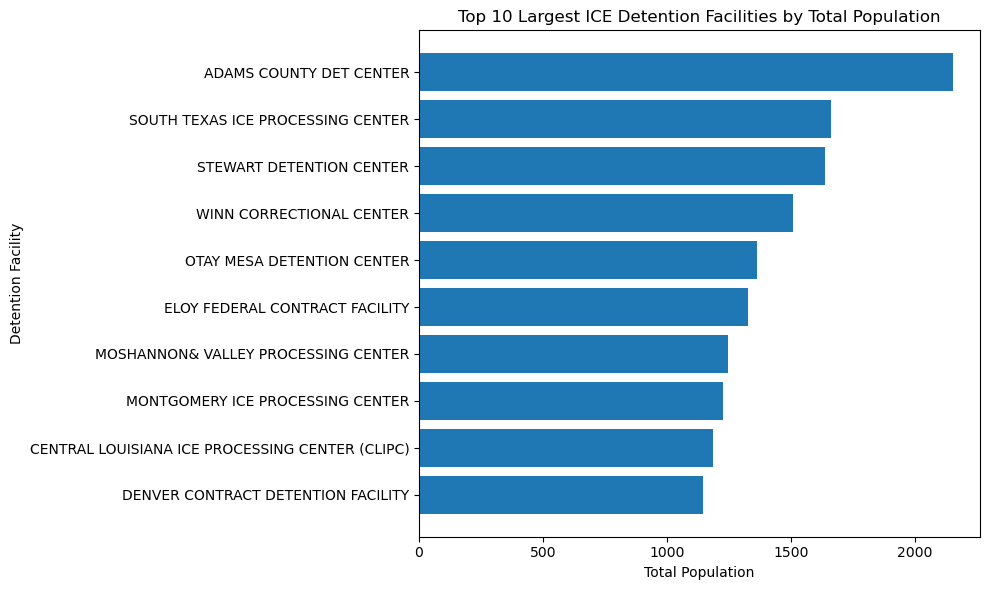

In [10]:
plt.figure(figsize=(10, 6))

plt.barh(
    top_10["name"],
    top_10["total_population"]
)

plt.xlabel("Total Population")
plt.ylabel("Detention Facility")
plt.title("Top 10 Largest ICE Detention Facilities by Total Population")

plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig("top_10_detention_facilities.png", dpi=300)
plt.show()

Notes on resources & AI usage

In [ ]:
"""
Resources and AI Usage Disclosure

This analysis was completed using Python with the pandas and matplotlib
libraries.

ChatGPT was used as a reference tool to:
- Clarify the exercise requirements
- Structure the data cleaning and analysis workflow
- Improve documentation and explanation of assumptions

All code was reviewed, adapted, and written to meet the specific
requirements of this exercise.

Link to ChatGPT prompt page:
https://chatgpt.com/share/696e59b1-5cfc-800a-8310-cb7099e5282c
"""